In [1]:
#!git clone https://github.com/luischuquim/Healthy-Defective-Fruits.git

Cloning into 'Healthy-Defective-Fruits'...
error: 6505 bytes of body are still expected
fetch-pack: unexpected disconnect while reading sideband packet
fatal: early EOF
fatal: fetch-pack: invalid index-pack output


In [ ]:
#pip install numpy scipy joblib
#pip install pillow
#pip install matplotlib
#pip install scikit-learn


In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


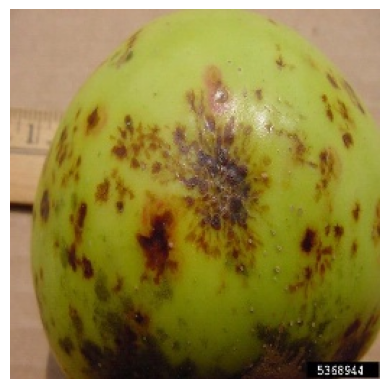

In [2]:

# Open the image file
img = Image.open(r'Healthy-Defective-Fruits-main\apple_images\apple_real_images\bruise_defect\M_REAL_0001.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: to hide the axis
plt.show()

In [13]:

def load_and_preprocess_images(directory, target_size=(150, 150),ext=".jpg"):
    """
    Load images from a directory, resize them, and normalize the pixel values.

    Parameters:
    - directory: Path to the directory containing the images.
    - target_size: Desired size of the images as (height, width).

    Returns:
    - A NumPy array containing the preprocessed images.
    """
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(ext):  # Assuming the images are in JPEG format
            # Load the image
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path).convert('RGB')  # Ensure images are in RGB format

            # Resize the image
            img = img.resize(target_size)

            # Convert the image to a NumPy array and normalize pixel values
            img_array = np.array(img) / 255.0  # Normalize to 0-1 range

            # Append to the list of images
            images.append(img_array)

    # Convert the list of images to a NumPy array
    return np.array(images)

# Directory containing the images
directory1 = r'Healthy-Defective-Fruits-main\apple_images\apple_real_images\bruise_defect'
directory2 = r'Healthy-Defective-Fruits-main\apple_images\apple_real_images\fresh'
# Load, reshape, and normalize the images
preprocessed_images1 = load_and_preprocess_images(directory1)[:200]
preprocessed_images2 = load_and_preprocess_images(directory2)[:200]

full_dataset = np.concatenate((preprocessed_images1,preprocessed_images2),axis=0)
print("Shape of the preprocessed images array:", preprocessed_images1.shape)
print("Shape of the preprocessed images array 2:", preprocessed_images2.shape)
print("Shape of the preprocessed images array:", full_dataset.shape)

# create target variable for above classes
y1=np.ones(750)[:200]
y2=np.zeros(2500)[:200]
y=np.concatenate((y1,y2),axis=0)
y.shape


Shape of the preprocessed images array: (200, 150, 150, 3)
Shape of the preprocessed images array 2: (200, 150, 150, 3)
Shape of the preprocessed images array: (400, 150, 150, 3)


(400,)

In [14]:

# x_train,x_test,y_train,y_test = train_test_split(full_dataset,y,test_size=0.2,random_state=44,stratify=True)
# print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)



# Assuming `full_dataset` is your features and `y` is your labels
x_train, x_test, y_train, y_test = train_test_split(full_dataset, y, test_size=0.2, random_state=44, stratify=y)  # Note `stratify=y` here
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(320, 150, 150, 3) (80, 150, 150, 3) (320,) (80,)


In [15]:


def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# model.fit(X_train, y_train, epochs=EPOCHS)


In [16]:


# Example input shape and data (replace these with your actual data and shape)
# input_shape = (150,150,3)  # Modify this as per your dataset
# x_train = np.random.random((100, 64, 64, 3))  # Dummy data
# y_train = np.random.randint(2, size=(100, 1))  # Dummy binary labels

def build_and_compile_model(conv_layers, dense_units, learning_rate,op_activation):
    model = models.Sequential()
    model.add(layers.Conv2D(conv_layers[0], (3, 3), activation='relu', input_shape=(150,150,3)))
    model.add(layers.MaxPooling2D((2, 2)))
    for layer_size in conv_layers[1:]:
        model.add(layers.Conv2D(layer_size, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(2, activation=op_activation))#'softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameters sets to try
hyperparameters = [
    {'conv_layers': [32, 64, 64], 'dense_units': 64, 'learning_rate': 1e-2,'op_activation':'softmax'},
    {'conv_layers': [32, 64, 64], 'dense_units': 64, 'learning_rate': 1e-2,'op_activation':'sigmoid'},
    # Add more hyperparameter configurations here
]

best_accuracy = 0
best_hyperparameters = None

for params in hyperparameters:
    model = build_and_compile_model(**params)
    history = model.fit(x_train, y_train, epochs=1, validation_split=0.2, verbose=1)
    accuracy = max(history.history['val_accuracy'])  # Get the best validation accuracy
    print(f"Params: {params}, Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = params

print(f"Best Hyperparameters: {best_hyperparameters}, Accuracy: {best_accuracy}")


c:\Users\Dell\OneDrive\Documents\Projects\Fruit_defective_DL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5724 - loss: 9.6121 - val_accuracy: 0.4531 - val_loss: 0.6939
Params: {'conv_layers': [32, 64, 64], 'dense_units': 64, 'learning_rate': 0.01, 'op_activation': 'softmax'}, Accuracy: 0.453125
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5599 - loss: 7.4906 - val_accuracy: 0.9375 - val_loss: 0.4548
Params: {'conv_layers': [32, 64, 64], 'dense_units': 64, 'learning_rate': 0.01, 'op_activation': 'sigmoid'}, Accuracy: 0.9375
Best Hyperparameters: {'conv_layers': [32, 64, 64], 'dense_units': 64, 'learning_rate': 0.01, 'op_activation': 'sigmoid'}, Accuracy: 0.9375


In [17]:
# Assume X_train, y_train are your data and labels
# model = build_model(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS))
model=build_model((150,150,3))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     4,735,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,791,490 (18.28 MB)

 Trainable params: 4,791,490 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(x_train, y_train, epochs=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7679 - loss: 0.6114


In [19]:
# Evaluate the model
model.evaluate(x_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 1.0000 - loss: 0.0052


[0.007777746766805649, 1.0]

In [31]:
full_dataset[1]

array([[[0.91764706, 0.87843137, 0.83137255],
        [0.91764706, 0.87843137, 0.83137255],
        [0.91764706, 0.87843137, 0.83137255],
        ...,
        [0.87843137, 0.86666667, 0.80784314],
        [0.87843137, 0.86666667, 0.80784314],
        [0.8745098 , 0.8627451 , 0.80392157]],

       [[0.91764706, 0.87843137, 0.83137255],
        [0.91764706, 0.87843137, 0.83137255],
        [0.91764706, 0.87843137, 0.83137255],
        ...,
        [0.87843137, 0.86666667, 0.80784314],
        [0.8745098 , 0.8627451 , 0.80392157],
        [0.87058824, 0.85882353, 0.8       ]],

       [[0.91372549, 0.8745098 , 0.82745098],
        [0.91372549, 0.8745098 , 0.82745098],
        [0.91372549, 0.8745098 , 0.82745098],
        ...,
        [0.8745098 , 0.8627451 , 0.80392157],
        [0.87058824, 0.85882353, 0.8       ],
        [0.86666667, 0.85490196, 0.79607843]],

       ...,

       [[0.9372549 , 0.89803922, 0.8627451 ],
        [0.9372549 , 0.89803922, 0.8627451 ],
        [0.93333333, 0

In [32]:
# Make predictions
predictions = model.predict(full_dataset[0:1])

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)
print(f"Predicted: {predicted_labels}")
# # Display the first few predictions
# for i in range(10):
#     print(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Predicted: [1]


In [40]:
print(np.argmax(model.predict(preprocessed_images3),axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
[1]


In [47]:
model.save('model.h5')

In [46]:
loaded_model = tf.keras.models.load_model('model.h5')
loaded_model.predict(full_dataset[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


array([[0.00136876, 0.9986312 ]], dtype=float32)

In [36]:
pred_directory3 = r'Healthy-Defective-Fruits-main\apple_images\apple_synthethic_images\fresh'
# Load, reshape, and normalize the images
preprocessed_images3 = load_and_preprocess_images(r'C:\Users\Dell\OneDrive\Documents\Projects\Fruit_defective_DL\tempp',ext=".png")
preprocessed_images3

array([[[[0.94117647, 0.97254902, 0.98431373],
         [0.93333333, 0.96470588, 0.97647059],
         [0.9254902 , 0.95686275, 0.96862745],
         ...,
         [0.94117647, 0.97647059, 0.97254902],
         [0.9372549 , 0.97254902, 0.96862745],
         [0.94901961, 0.98431373, 0.98039216]],

        [[0.93333333, 0.96470588, 0.97647059],
         [0.9254902 , 0.95686275, 0.96862745],
         [0.91764706, 0.94901961, 0.96078431],
         ...,
         [0.94117647, 0.97647059, 0.97254902],
         [0.9372549 , 0.97254902, 0.96862745],
         [0.94901961, 0.98431373, 0.98039216]],

        [[0.93333333, 0.96470588, 0.97647059],
         [0.92941176, 0.96078431, 0.97254902],
         [0.92941176, 0.96078431, 0.97254902],
         ...,
         [0.94117647, 0.97647059, 0.97254902],
         [0.9372549 , 0.97254902, 0.96862745],
         [0.94901961, 0.98431373, 0.98039216]],

        ...,

        [[0.92156863, 0.9372549 , 0.94117647],
         [0.90980392, 0.9254902 , 0.92941176]

In [34]:
# import os
# os.system('')

import os
import shutil

# Create a folder
folder_name = "temp"
os.makedirs(folder_name)

# Copy an image file to that folder
source_image = r"C:\Users\Dell\OneDrive\Documents\Projects\Fruit_defective_DL\Healthy-Defective-Fruits-main\apple_images\apple_synthethic_images\fresh\SD_SINT_0001.png"  # Provide the path to your source image
destination_folder = folder_name
shutil.copy(source_image, destination_folder)

# Delete the folder
# os.system(f"rm -rf {folder_name}")


'tempp\\SD_SINT_0001.png'